In [1]:
from pricer import ShockLimits, generate_shock_grid
price = 40.0
price_limits = ShockLimits(0.3, 0.3, 100)
volatility = 0.4
volatility_limits = ShockLimits(0.5, 0.5, 100)
shock_grid = generate_shock_grid(price, price_limits, volatility, volatility_limits)

In [8]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
import pytz

from pricer import Call

strike = 45.0
four_months = datetime.now() + relativedelta(months=4)
four_months_iso = pytz.utc.localize(four_months).isoformat()
cost = 3.0

call = Call(strike, four_months_iso, cost)

In [9]:
risk_free_rate = 0.04
valuations = shock_grid.value_black_scholes(call, risk_free_rate)

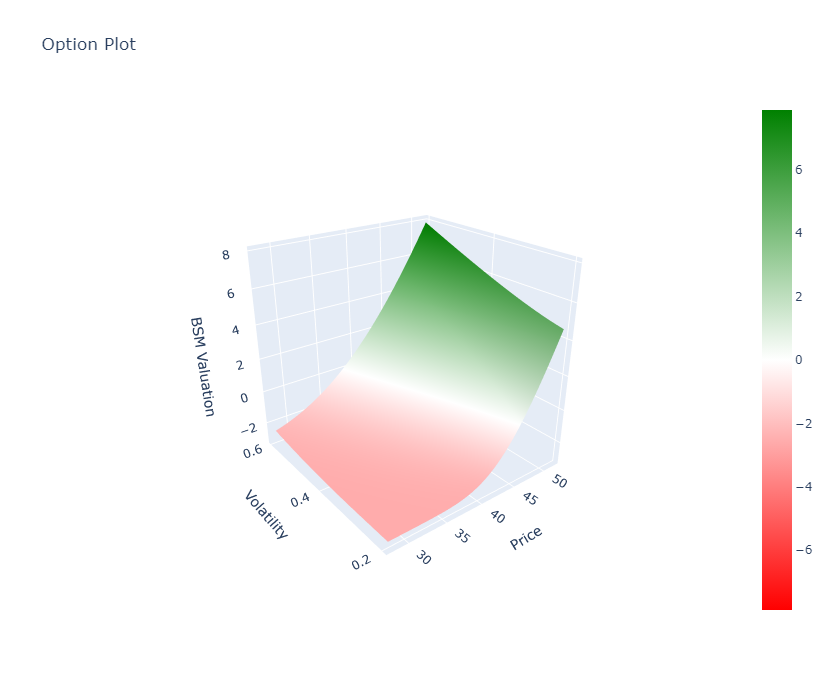

In [17]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(x=shock_grid.prices(), y=shock_grid.volatilities(), z=valuations, cmid=0., colorscale=["red", "white", "green"])])
fig.update_layout(title="Option Plot", width=700, height=700)
fig.update_scenes(xaxis_title_text='Price', yaxis_title_text='Volatility', zaxis_title_text='BSM Valuation')
fig.show()